# Аналитика в Яндекс.Афише

Данные собраны с сайта Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* данные о посещениях сайта Яндекс.Афиши;
* заказы за рассматриваемый период;
* рекламные расходы;

Задача - оптимизация маркетинговых затрат.

Переменные содержат информацию о девайсе, конце и начале визита, номер источника, идентификаторе пользователя, выручке, затратах и так далее.

### Содержание проекта

1. [Загрузка данных и подготовка их к анализу](#start)
    * [Вывод](#conc0)
2. [Построение отчётов и расчет метрик](#metrics)
    * [Продукт](#datasets1)
    * [Продажи](#datasets2)
    * [Маркетинг](#datasets3)
    * [Вывод](#conc1)
3. [Общий вывод](#conclusion)

## Шаг 1. Загрузка данных и подготовка их к анализу  <a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
import numpy as np
from IPython.display import display
import plotly.express as px 
import seaborn as sns
from matplotlib import pyplot as plt
import statistics 
import warnings
import plotly.io as pio
pio.renderers.default = "svg"
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропущенных данных нет. В датасетах visits и orders необходимо поменять названия переменных для использования в дальнейшем анализе.

In [6]:
visits = visits.rename(str.lower, axis='columns')
visits = visits.rename(columns={'end ts':'end_ts', 'start ts':'start_ts','source id':'source_id'})
orders = orders.rename(str.lower, axis='columns')
orders = orders.rename(columns={'buy ts':'buy_ts'})

В датасетах visits, orders необходимо заменить тип данных переменных start_ts, end_ts, buy_ts на datetime.

In [7]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

### Вывод <a id="conc0"></a>

Данные не содержат пропущенных переменных, были заменены названия переменных и изменен тип данных для переменных, содержащих даты.

## Шаг 2. Построение отчётов и расчет метрик  <a id="metrics"></a>

### Продукт  <a id="datasets1"></a>

* **Сколько людей пользуются в день, неделю, месяц?**

In [8]:
visits['week']=visits['start_ts'].dt.week
visits['month']=visits['start_ts'].dt.month
visits['year']=visits['start_ts'].dt.year
visits['session']=visits['start_ts'].dt.date

In [9]:
dau_total= visits.groupby('session').agg({'uid': 'nunique'}).mean()
wau_total= visits.groupby('week').agg({'uid': 'nunique'}).mean()
mau_total= visits.groupby(['month','year']).agg({'uid': 'nunique'}).mean()

In [10]:
print(int(dau_total), 'в среднем пользователей за день используют Яндекс.Афиши')
print(int(wau_total), 'в среднем пользователей за неделю используют Яндекс.Афиши')
print(int(mau_total), 'в среднем пользователей за месяц используют Яндекс.Афиши')

907 в среднем пользователей за день используют Яндекс.Афиши
5825 в среднем пользователей за неделю используют Яндекс.Афиши
23228 в среднем пользователей за месяц используют Яндекс.Афиши


Рассмотрим изменение данных показателей во времени.

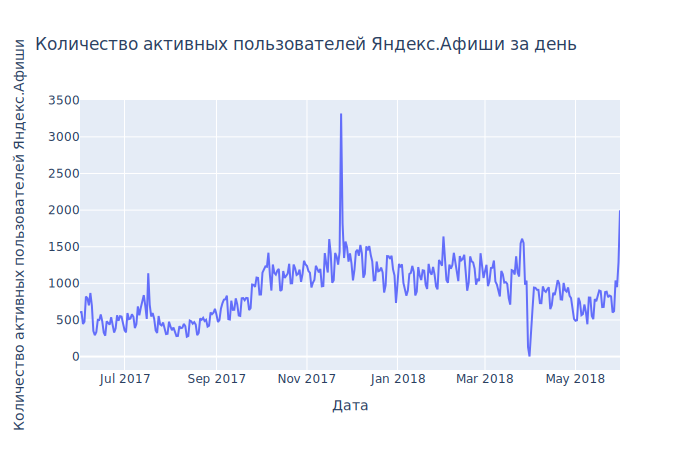

In [11]:
fig = px.line(visits.groupby('session').agg({'uid': 'nunique'}).reset_index(),x='session',y='uid',title = 'Количество активных пользователей Яндекс.Афиши за день',labels={'uid':'Количество активных пользователей Яндекс.Афиши','session':'Дата'})
fig.show()

Text(0, 0.5, 'Количество активных пользователей Яндекс.Афиши')

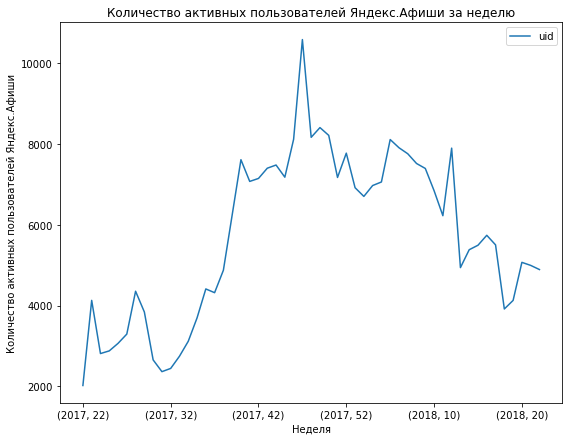

In [12]:
visits.groupby(['year','week']).agg({'uid': 'nunique'}).plot(title = 'Количество активных пользователей Яндекс.Афиши за неделю',figsize=(9,7))
plt.xlabel("Неделя")
plt.ylabel("Количество активных пользователей Яндекс.Афиши")

Text(0, 0.5, 'Количество активных пользователей Яндекс.Афиши')

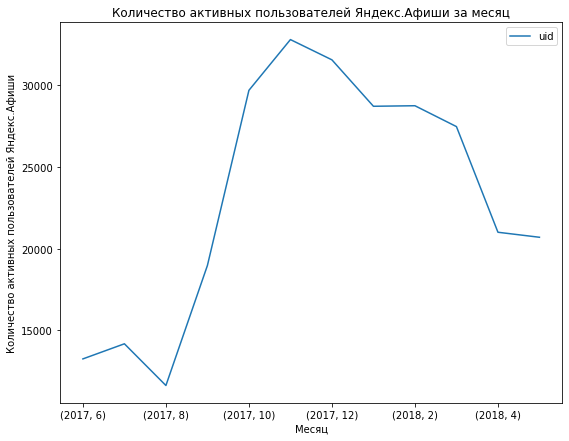

In [13]:
visits.groupby(['year','month']).agg({'uid': 'nunique'}).plot(title ='Количество активных пользователей Яндекс.Афиши за месяц',figsize=(9,7))
plt.xlabel("Месяц")
plt.ylabel("Количество активных пользователей Яндекс.Афиши")

Количество активных пользователей увеличилось к концу 2017 года, а затем начало снижаться. Можно предположить, что сервис был наиболее популярен среди пользователей на конец 2017 года и начало 2018 в связи с новогодними праздниками.

* **Сколько сессий в день?**

Рассмотрим, сколько сессий в день совершает один пользователь.

In [14]:
sessions_per_user = visits.groupby(['session']).agg({'uid': ['count','nunique']})
sessions_per_user.columns=['num_sessions', 'num_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['num_sessions'] / sessions_per_user['num_users']
print(sessions_per_user['sessions_per_user'].mean())

1.0821696440039723


В среднем человек совершает одну сессию в день. Рассмотрим, как менялся данный показатель на протяжении всего периода.

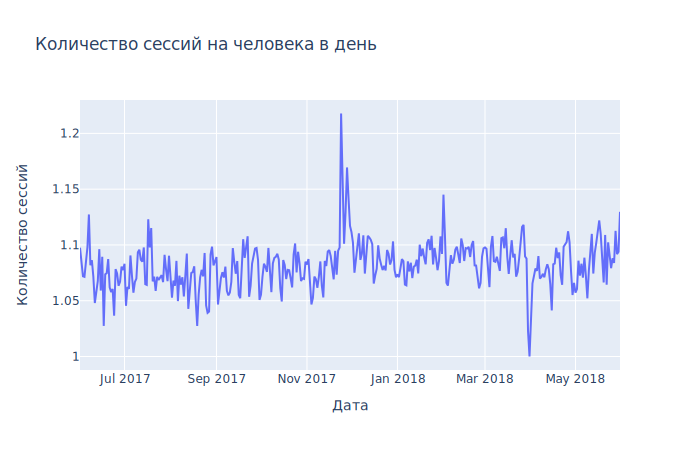

In [15]:
fig = px.line(sessions_per_user.reset_index(),x='session',y='sessions_per_user',title = 'Количество сессий на человека в день',labels={'sessions_per_user':'Количество сессий','session':'Дата'})
fig.show()

Показатель несильно изменяется с течением времени. Можно также увидеть скачок в декабре 2017 года и падение в апреле 2018.

Далее посмотрим сколько всего сессий в день совершают все пользователи.

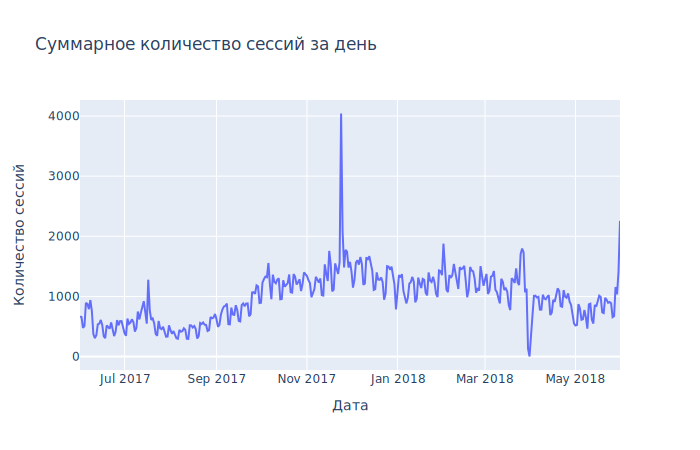

In [16]:
fig = px.line(visits.groupby(['session']).agg({'uid': 'count'}).reset_index(),x='session',y='uid',title = 'Суммарное количество сессий за день',labels={'uid':'Количество сессий','session':'Дата'})
fig.show()


В среднем пользователями за день совершается около 1000 сессий. Также можно увидеть, что пик по количеству сессий был в ноябре-декабре 2017 года.

* **Сколько длится одна сессия?**

In [17]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean()/60) 

10.725108143201632


В среднем длительность одной сессии составляет 10-11 минут.

In [18]:
statistics.mode(visits['session_duration_sec']/60)

1.0

При этом модальное значение - 1 минута

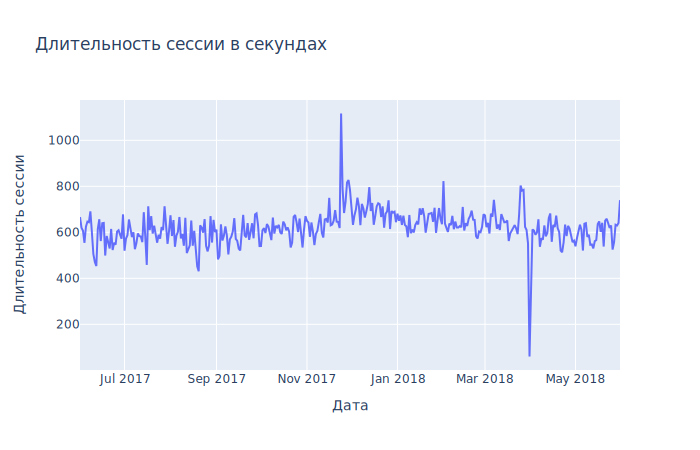

In [19]:
fig = px.line(visits.groupby(['session']).agg({'session_duration_sec': 'mean'}).reset_index(),x='session',y='session_duration_sec',title = 'Длительность сессии в секундах',labels={'session_duration_sec':'Длительность сессии','session':'Дата'})
fig.show()


Можно заметить, что среднее время сессии несильно изменяется с течением времени. В декабре среднее время сессии достигает максимального значения, в апреле 2018 года - минимальное.

* **Как часто люди возвращаются?**

Рассчитаем показатель retention rate.

In [20]:
visits['session']=pd.to_datetime(visits['session'])
visits['first_active_date']=visits['session'].astype('datetime64[M]')
visits['session_date']=visits['session'].astype('datetime64[M]')

In [21]:
first_activity_date = visits.groupby(['uid'])['first_active_date'].min()

In [22]:
visits = visits.join(first_activity_date, on='uid',how='left',rsuffix='_right') 

In [23]:
visits['cohort_lifetime'] = visits['session'] - visits['first_active_date_right']


In [24]:
visits['cohort_lifetime'].describe()

count                        359400
mean     44 days 12:12:14.664441104
std      65 days 15:19:37.509148244
min                 0 days 00:00:00
25%                10 days 00:00:00
50%                21 days 00:00:00
75%                31 days 00:00:00
max               364 days 00:00:00
Name: cohort_lifetime, dtype: object

In [25]:
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')

In [26]:
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int') 

In [27]:
cohorts = visits.groupby(['first_active_date_right','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 


In [28]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_active_date_right','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_active_date_right') 

In [29]:
cohorts['first_active_date_right'] = cohorts['first_active_date_right'].dt.date

In [30]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [31]:
retention_pivot = cohorts.pivot_table(index='first_active_date_right',columns='cohort_lifetime',values='retention',aggfunc='sum')

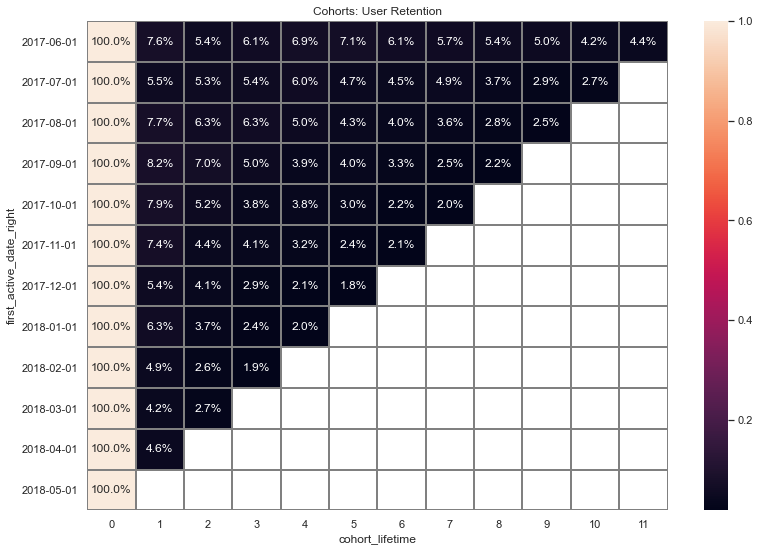

In [32]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

In [33]:
retention_pivot[1].mean()*100

6.32312691464258

В среднем возвращаются во втором месяце 6,32% пользователей.


Во второй месяц retention rate среди когорт варьируется от 4.2% до 8.2%. Самые низкие показатели первой недели среди когорт, пришедших в последние месяцы наблюдаемого периода.

При этом более 90% пользователей отсеиваются на следующий месяц после использования сервиса. В последующие месяцы уходит сравнительно меньшее количество пользователей. 

### Продажи  <a id="datasets2"></a>

* **Когда люди начинают покупать?**

In [34]:
df = visits
df = df.groupby(['uid'])['start_ts'].min().to_frame()

In [35]:
orders1 = orders.groupby(['uid'])['buy_ts'].min().to_frame()

In [36]:
df = df.merge(orders1, how= 'inner', on='uid')

In [37]:
display(df)

,start_ts,buy_ts
uid,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00


In [38]:
df['min_time'] = (df['buy_ts'] - df['start_ts']).dt.total_seconds()/60

In [39]:
df['min_time'].mean()

24340.175834405716

In [40]:
display(df)

,start_ts,buy_ts,min_time
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,154022.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...
18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,137973.0
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,7.0
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,333303.0


Можно увидеть, что значения минимального времени между первым посещением и первым заказом очень разбросаны. Рассмотрим график boxplot без выбросов, а также квантили.

Text(0, 0.5, 'Минуты')

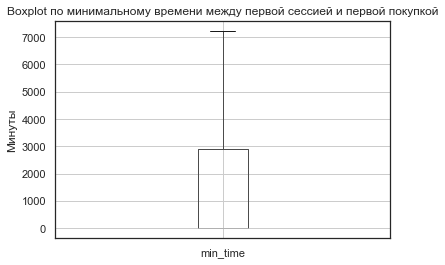

In [41]:
df.boxplot('min_time',showfliers=False)
plt.title('Boxplot по минимальному времени между первой сессией и первой покупкой')
plt.ylabel("Минуты")

In [42]:
df['min_time'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: min_time, dtype: float64

Получаем, что для 75% значений минимальное время между первой сессией и заказом составляет менее 2897 минут или менее 2 дней.

Рассмотрим также модальное значение

In [43]:
df['min_time'].mode()

0    1.0
dtype: float64

Получаем, что модальное значение это 1 минута, медианное - 16 минут, среднее - 24340 минут. При этом 75% пользователей совершили покупку менее, чем за два дня между первым посещением и первой покупкой. Среднее смещается максимальными значениями.
Так, первая сессия пользователя *313578113262317* состоялась 2017-09-18 22:49:00, а первая покупка 2018-01-03 21:51:00.

* **Сколько раз покупают за период?**

In [44]:
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')

In [45]:
orders1 = orders.pivot_table(index ='buy_ts', values = ['revenue','uid'], aggfunc = {'revenue':'count','uid':'nunique'})

orders1 = orders1.reset_index()
orders1['orders_per_user'] = orders1['revenue']/orders1['uid']
display(orders1)


,buy_ts,revenue,uid,orders_per_user
0,2017-06-01,2354,2023,1.163618
1,2017-07-01,2363,1984,1.191028
2,2017-08-01,1807,1472,1.227582
3,2017-09-01,3387,2750,1.231636
4,2017-10-01,5679,4675,1.214759
5,2017-11-01,5659,4547,1.244557
6,2017-12-01,6218,4942,1.258195
7,2018-01-01,4721,3898,1.211134
8,2018-02-01,5281,4258,1.240254
9,2018-03-01,5326,4181,1.273858


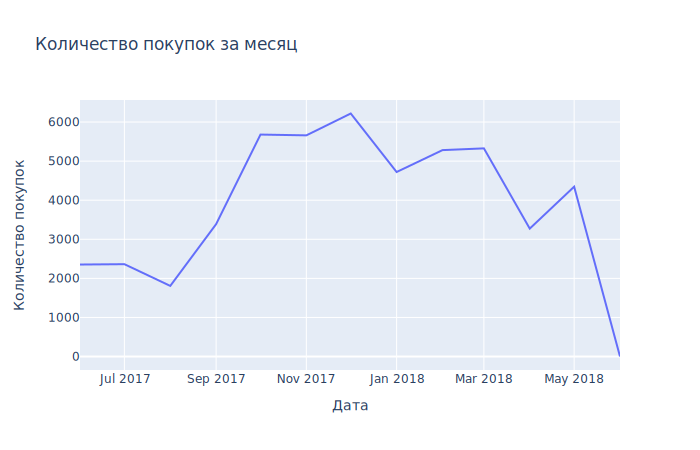

In [46]:
fig = px.line(orders1.groupby(['buy_ts']).agg({'revenue': 'sum'}).reset_index(),x='buy_ts',y='revenue',title = 'Количество покупок за месяц',labels={'revenue':'Количество покупок','buy_ts':'Дата'})
fig.show()



In [47]:
orders1['orders_per_user'].mean()

1.2058233446244648

In [48]:
orderss = orders['revenue'].count()
orderss1 = orders['uid'].nunique()
print(orderss/orderss1)

1.3803630588943954


В среднем пользователь за все время делает 1,38 покупок. Среднее за месяц - 1,21.

Можно сделать вывод, что количество покупок на сервисе увеличивается к концу года, затем значения уменьшаются к летнему периоду 2018 года.

* **Какой средний чек?**

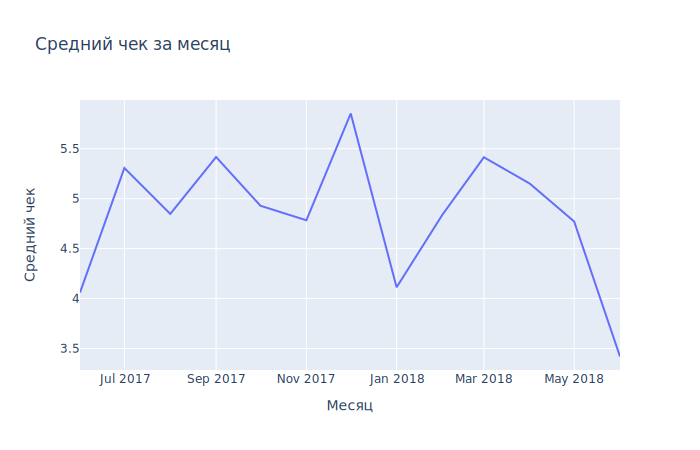

In [91]:
fig = px.line(orders.groupby(['buy_ts']).agg({'revenue': 'mean'}).reset_index(),x='buy_ts',y='revenue',title = 'Средний чек за месяц',labels={'revenue':'Средний чек','buy_ts':'Месяц'})
fig.show()



In [50]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

In [51]:
orders['revenue'].mode()

0    1.83
dtype: float64

Средний чек среди пользователей варьируется от 3,4 до 5,8. Модальное значение составляет 1,83.

* **Сколько денег приносят? (LTV)**

In [52]:
orders2= orders

In [53]:
first_orders = orders2.groupby('uid').agg({'buy_ts': 'min'}).reset_index()

In [54]:
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


In [55]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [56]:
orders_new = pd.merge(orders,first_orders, on='uid')
cohorts = orders_new.groupby(['first_order_month','buy_ts']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 1

In [57]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_ts'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

In [58]:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2) 
output.cumsum(axis=1).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


In [59]:
output2 = output.cumsum(axis=1)
output3 = output2.drop(columns = [0,1,2,3,4,6,7,8,9,10,11])

In [60]:
display(output3)

age,5
first_order_month,
2017-06-01,8.36
2017-07-01,7.67
2017-08-01,7.37
2017-09-01,12.31
2017-10-01,6.16
2017-11-01,6.27
2017-12-01,7.65
2018-01-01,NaN
2018-02-01,NaN


Наибольшие и более устойчивые показатели LTV демонстрирует когорты июня и сентября 2017 года. После первого месяца среди всех когорт изменяется средняя выручка, что связано с низким показателем retention rate после первого периода. 

### Маркетинг  <a id="datasets3"></a>

* **Сколько денег потратили? Всего / на каждый источник / по времени**

In [61]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [62]:
costs['costs'].sum()

329131.62

Всего расходы составили 329131.

In [63]:
costs_group = costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum')
display(costs_group)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Больше всего средств было привлечено на источник 3 (141321,6) и источник 4 (61073,6). Меньше всего было вложено на источники 9 и 10 (5517,49 и 5822,49).

In [64]:
costs['dt']=costs['dt'].astype('datetime64[M]')

In [65]:
costs_g = costs.pivot_table(index = 'dt', values = 'costs', aggfunc = 'sum')

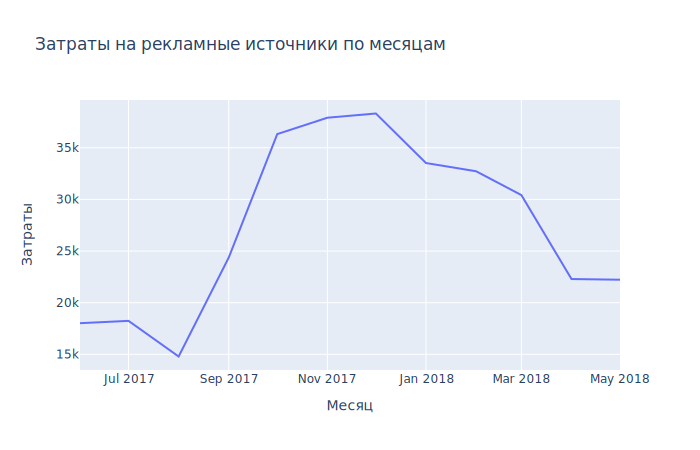

In [92]:
fig = px.line(costs.pivot_table(index = 'dt', values = 'costs', aggfunc = 'sum').reset_index(),x='dt',y='costs',title = 'Затраты на рекламные источники по месяцам',labels={'costs':'Затраты','dt':'Месяц'})
fig.show()




Затраты на рекламные источники возрастают с августа по декабрь, затем происходит снижение затрат в течение первой половины 2018 года.

* **Сколько стоило привлечение одного покупателя из каждого источника?**

In [67]:
display(visits.head(10))

,device,end_ts,source_id,start_ts,uid,week,month,year,session,session_duration_sec,first_active_date,session_date,first_active_date_right,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20,1080,2017-12-01,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19,1680,2018-02-01,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018,2018-05-20,1440,2018-05-01,2018-05-01,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,52,12,2017,2017-12-27,0,2017-12-01,2017-12-01,2017-12-01,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,35,9,2017,2017-09-03,60,2017-09-01,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,5,1,2018,2018-01-30,3360,2018-01-01,2018-01-01,2017-06-01,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,44,11,2017,2017-11-05,60,2017-11-01,2017-11-01,2017-11-01,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,29,7,2017,2017-07-19,180,2017-07-01,2017-07-01,2017-07-01,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,45,11,2017,2017-11-08,60,2017-11-01,2017-11-01,2017-11-01,0


In [68]:
vis = visits.pivot_table(index = ['first_active_date_right','source_id'], values = 'uid', aggfunc ='nunique').reset_index()
display(vis)

,first_active_date_right,source_id,uid
0,2017-06-01,1,1513
1,2017-06-01,2,2202
2,2017-06-01,3,5199
3,2017-06-01,4,4602
4,2017-06-01,5,3566
...,...,...,...
97,2018-05-01,4,5474
98,2018-05-01,5,3169
99,2018-05-01,7,2
100,2018-05-01,9,333


In [69]:
monthly_costs = costs.groupby(['dt','source_id'])['costs'].sum().reset_index()
display(monthly_costs)

,dt,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [70]:
vis_new = pd.merge(vis, monthly_costs, left_on=['first_active_date_right','source_id'], right_on=['dt','source_id'])


In [71]:
display(vis_new)

,first_active_date_right,source_id,uid,dt,costs
0,2017-06-01,1,1513,2017-06-01,1125.61
1,2017-06-01,2,2202,2017-06-01,2427.38
2,2017-06-01,3,5199,2017-06-01,7731.65
3,2017-06-01,4,4602,2017-06-01,3514.80
4,2017-06-01,5,3566,2017-06-01,2616.12
...,...,...,...,...,...
79,2018-05-01,3,3972,2018-05-01,9411.42
80,2018-05-01,4,5474,2018-05-01,4214.21
81,2018-05-01,5,3169,2018-05-01,3669.56
82,2018-05-01,9,333,2018-05-01,362.17


In [72]:
vis_new['cac']=vis_new['costs']/vis_new['uid']

In [73]:
display(vis_new.head(10))

,first_active_date_right,source_id,uid,dt,costs,cac
0,2017-06-01,1,1513,2017-06-01,1125.61,0.743959
1,2017-06-01,2,2202,2017-06-01,2427.38,1.102352
2,2017-06-01,3,5199,2017-06-01,7731.65,1.487142
3,2017-06-01,4,4602,2017-06-01,3514.80,0.763755
4,2017-06-01,5,3566,2017-06-01,2616.12,0.733629
5,2017-06-01,9,1057,2017-06-01,285.22,0.269839
6,2017-06-01,10,543,2017-06-01,314.22,0.578674
7,2017-07-01,1,1282,2017-07-01,1072.88,0.836880
8,2017-07-01,2,1974,2017-07-01,2333.11,1.181920
9,2017-07-01,3,4582,2017-07-01,7674.37,1.674895


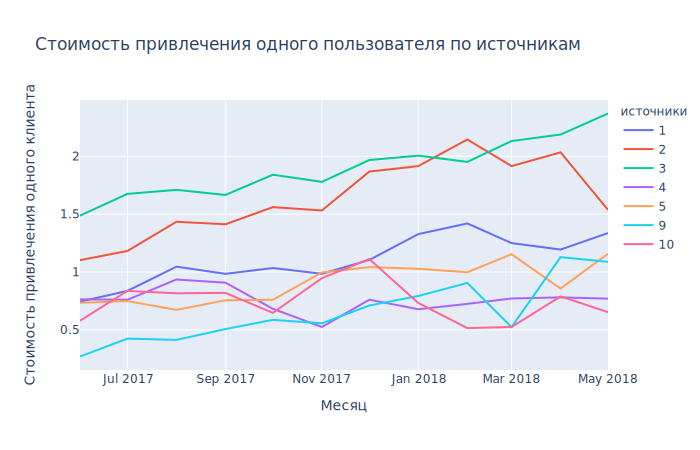

In [74]:
fig = px.line(vis_new,x='dt',y='cac',color='source_id',title = 'Стоимость привлечения одного пользователя по источникам',labels={'cac':'Стоимость привлечения одного клиента','dt':'Месяц','source_id':'источники'})
fig.show()

Самая большая стоимость привлечения одного пользователя из источников 3, 2 и 1. Самая низкая для источников 10, 9 и 4.

In [75]:
l = vis_new.pivot_table(index = 'dt',values='cac', aggfunc ='sum').reset_index()
display(l)

,dt,cac
0,2017-06-01,5.679350
1,2017-07-01,6.463783
2,2017-08-01,7.027156
3,2017-09-01,7.052374
4,2017-10-01,7.110458
5,2017-11-01,7.318775
6,2017-12-01,8.564445
7,2018-01-01,8.479131
8,2018-02-01,8.658783
9,2018-03-01,8.270071


In [76]:
m = pd.merge(l, output3, left_on='dt',right_on='first_order_month')
m['ltv-cac'] = m[5]-m['cac']
display(m)

,dt,cac,5,ltv-cac
0,2017-06-01,5.679350,8.36,2.680650
1,2017-07-01,6.463783,7.67,1.206217
2,2017-08-01,7.027156,7.37,0.342844
3,2017-09-01,7.052374,12.31,5.257626
4,2017-10-01,7.110458,6.16,-0.950458
5,2017-11-01,7.318775,6.27,-1.048775
6,2017-12-01,8.564445,7.65,-0.914445
7,2018-01-01,8.479131,NaN,NaN
8,2018-02-01,8.658783,NaN,NaN
9,2018-03-01,8.270071,NaN,NaN


In [77]:
cac=vis_new['costs'].sum()/vis_new['uid'].sum()
print(cac)

1.1846511175898928


CAC равен 1.18. Вложения на 6 месяц на привлечение окупились для когорт июня,июля, августа и сентября 2017 года.
  

* **На сколько окупились расходы? (ROI)**

In [78]:
first_visit=visits.groupby('uid').agg({'start_ts':'min'}).astype('datetime64').reset_index()

In [79]:
display(first_visit)

,uid,start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [80]:
visits= pd.merge(visits,first_visit,how='inner',on='uid')

In [81]:
visits_source = visits.query('start_ts_x==start_ts_y')

In [82]:
display(visits)

,device,end_ts,source_id,start_ts_x,uid,week,month,year,session,session_duration_sec,first_active_date,session_date,first_active_date_right,cohort_lifetime,start_ts_y
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,51,12,2017,2017-12-20,1080,2017-12-01,2017-12-01,2017-12-01,0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,8,2,2018,2018-02-19,1680,2018-02-01,2018-02-01,2018-02-01,0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,26,7,2017,2017-07-01,0,2017-07-01,2017-07-01,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,5,2018,2018-05-20,1440,2018-05-01,2018-05-01,2018-03-01,2,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,10,3,2018,2018-03-09,1680,2018-03-01,2018-03-01,2018-03-01,0,2018-03-09 20:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,17,4,2018,2018-04-23,480,2018-04-01,2018-04-01,2018-04-01,0,2018-04-23 21:11:00
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,45,11,2017,2017-11-08,0,2017-11-01,2017-11-01,2017-11-01,0,2017-11-08 13:39:00
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,31,7,2017,2017-07-31,1080,2017-07-01,2017-07-01,2017-07-01,0,2017-07-31 12:13:00
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,12,3,2018,2018-03-20,840,2018-03-01,2018-03-01,2018-03-01,0,2018-03-20 15:11:00


In [83]:
report_new12 = pd.merge(visits_source,orders,how='inner',on='uid')

In [84]:
report_new121 = report_new12.pivot_table(index = 'source_id', values = 'revenue', aggfunc = 'sum').reset_index()


In [85]:
display(report_new121)

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [86]:
costs_source = costs.pivot_table(index = 'source_id', values='costs', aggfunc= 'sum').reset_index()

In [87]:
display(costs_source)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [88]:
source_roi = pd.merge(costs_source,report_new121, on = 'source_id')

In [89]:
source_roi['roi']=((source_roi['revenue']-source_roi['costs'])/source_roi['costs']).round(2)

In [90]:
display(source_roi)

,source_id,costs,revenue,roi
0,1,20833.27,31090.55,0.49
1,2,42806.04,46923.61,0.10
2,3,141321.63,54511.24,-0.61
3,4,61073.60,56696.83,-0.07
4,5,51757.10,52624.02,0.02
5,9,5517.49,5759.40,0.04
6,10,5822.49,4450.33,-0.24


### Вывод <a id="conc1"></a>

Таким образом, окупились вложения источников 1, 2, 5 и 9. Первый источник является самым прибыльным, прибыль составила 49% с вложений. При этом 61% и 24% вложений с источников 3 и 10 пока не окупились. 

## Шаг 3. Общий вывод <a id="conclusion"></a>

В рассматриваемом периоде наблюдается рост выручки к концу 2017 года. Также увеличились расходы на привлечение пользователей через рекламные источники. Необходимо рассмотреть более длительный период, поскольку на увеличение выручки на конец 2017 года может влиять как сезонность, так и увеличение затрат на маркетинг.

Бизнес является "одноразовым", более 90% пользователей после первого посещения не возвращаются. Самыми окупаемыми являются источники 1, 2, 5 и 9.